In [25]:
# Download packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [26]:
# Fetch data
df = pd.read_csv(r'data/SAHeart.csv')
df = df.drop(columns=['row.names'])

N = df.shape[0]
M = df.shape[1]

print(f'N: {N}')
print(f'M: {M}')


N: 462
M: 10


In [27]:
df.head()


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [28]:
# Split into X and y
X = df.iloc[:,:-1]
y = df.loc[:,"chd"]

# Change to categorical
X['famhist'] = pd.Categorical(X['famhist']).codes
X.head()

print(f"{X.shape}, {y.shape}")

(462, 9), (462,)


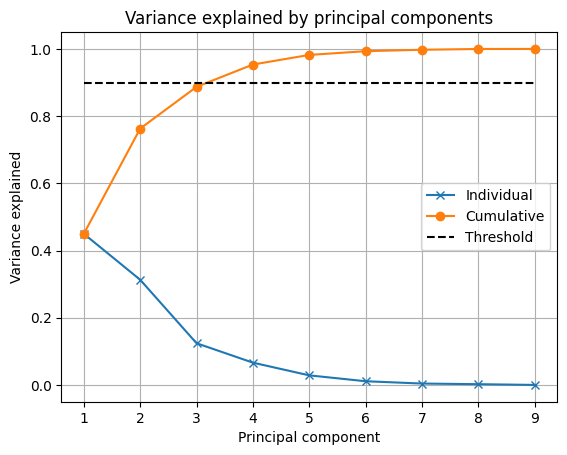

In [ ]:

# Create a PCA object and fit to the data
pca = PCA()

pca.fit(X)
V = pca.components_.T
# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


Þetta sýnir að við þurfum 4 PC til að útskýra variance'inn

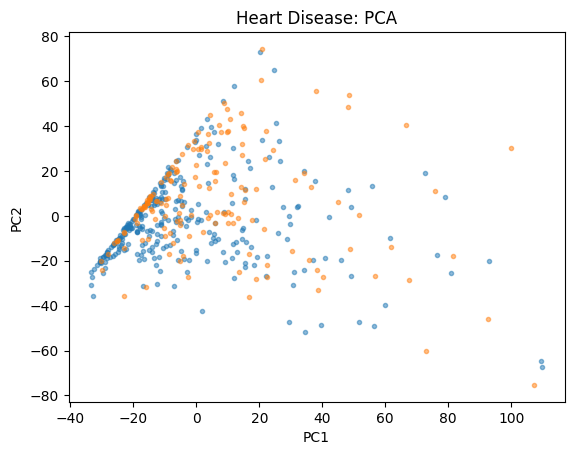

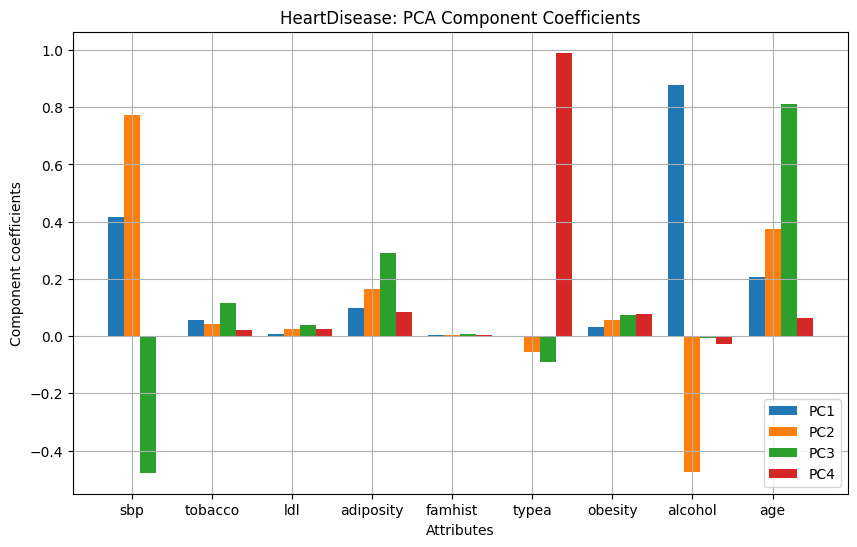

In [31]:
PC_idxs = [0, 1]  # Indices of the principal components to plot
unique_classes = np.unique(y) # Get unique classes from the target variable

# Project the data onto the first two principal components and plot
# Project X to the subspace
B = pca.transform(X)

# Plot PCA of the data
fig = plt.figure()
plt.title("Heart Disease: PCA")
# Plot the data projected onto the principal components, colored by chd
for is_chd in unique_classes:
    mask = (y == is_chd)
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5)

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.show()
### END SOLUTION


bw = 0.2
r = np.arange(1, X.shape[1] + 1)

fig = plt.figure(figsize=(10, 6))
plt.title("HeartDisease: PCA Component Coefficients")
for i, pc in enumerate(V[:, :4].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + bw, X.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

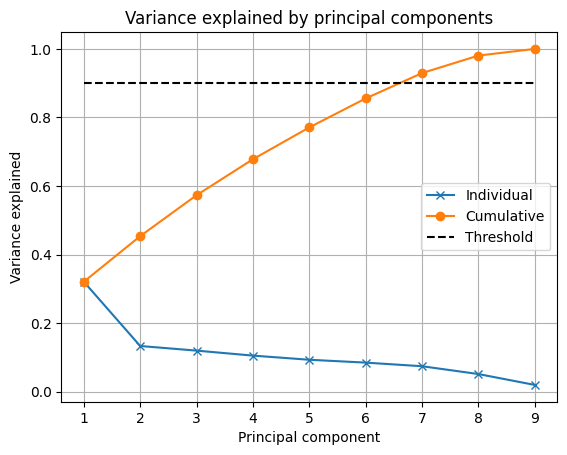

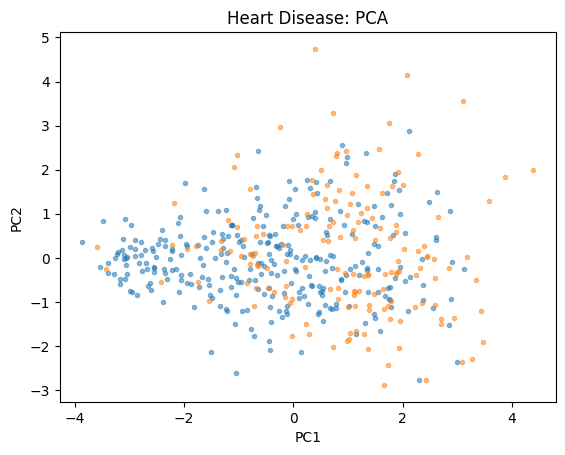

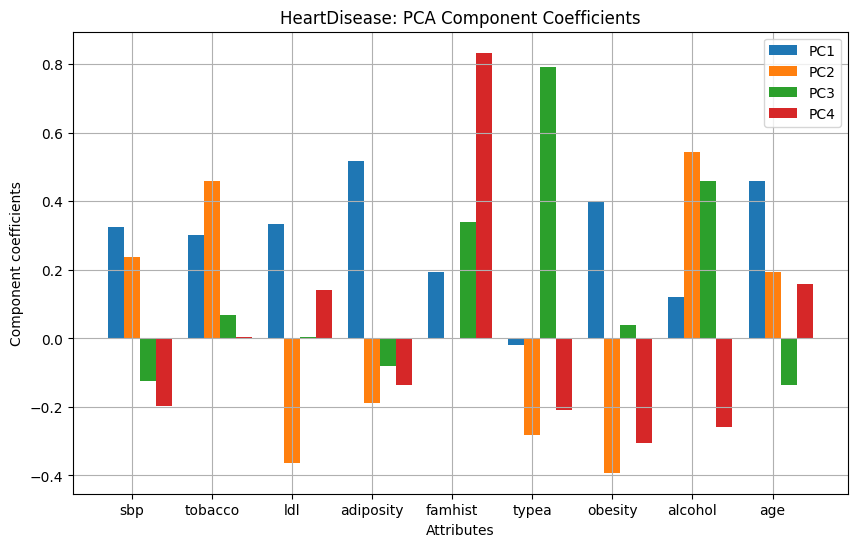

In [32]:
# Aftur nema normalized
X_tilde = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

pca = PCA()
pca.fit(X_tilde)
V = pca.components_.T
# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


PC_idxs = [0, 1]  # Indices of the principal components to plot
unique_classes = np.unique(y) # Get unique classes from the target variable

# Project the data onto the first two principal components and plot
# Project X to the subspace
B = pca.transform(X_tilde)

# Plot PCA of the data
fig = plt.figure()
plt.title("Heart Disease: PCA")
# Plot the data projected onto the principal components, colored by chd
for is_chd in unique_classes:
    mask = (y == is_chd)
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5)

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.show()
### END SOLUTION


bw = 0.2
r = np.arange(1, X.shape[1] + 1)

fig = plt.figure(figsize=(10, 6))
plt.title("HeartDisease: PCA Component Coefficients")
for i, pc in enumerate(V[:, :4].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + bw, X.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

